<a href="https://colab.research.google.com/github/ElhamAlQahtani/gmail-virtru/blob/main/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
data = pd.read_excel('/content/sample_data/All-Data-Virtru.xlsx')
data.head()

,GroupNumber,“ItrustthesecurityandprivacyofmyGmailaccountsinceitisprovidedb,HowwouldyourateyourfamiliaritywiththeEncryptionconceptonascalefr,Pleaseratethisdocumentsinformationsensitivity,How much do you worry about your email security (without Virtru)?,How concerned or unconcerned would you be if your email was being read by others?,"Please rate your level of disagreement or agreement with the following statements - “When I send an email (without Virtru), the only people who can read it are those I sent it to.”","Please rate your level of disagreement or agreement with the following statements - ""When I send sensitive information via email (without Virtru), I'm confident it's secure.""","Please rate your level of disagreement or agreement with the following statements - “If I delete an email I have sent, those I sent the email to can no longer read it.”",Please rate the following statements - How likely or unlikely is it for cybercriminals to attempt to access your personal email account?,...,How interested or uninterested are you in using Virtru?,When do you plan to use Virtru?,I strongly intend to use Virtru when I send these emails,"Rate your level of disagreement or agreement with the following statements: - “I intend to use standard email (e.g., Gmail) when I send emails, including sensitive information.”","Rate your level of disagreement or agreement with the following statements: - “I intend to use Virtru when I send emails, including sensitive information.”",How old are you?,What is your gender?,How would you describe your employment status?,Do you have any experience working in or studying computer-related fields?,What is the highest level of education you have completed or degree you have earned? - Selected Choice
0,Group1,3,3,4,4,4,2,2,1,4,...,4,2,1,4,4,2,1,1,0,4
1,Group1,3,2,4,4,4,3,1,2,3,...,4,2,1,2,4,2,1,4,1,3
2,Group1,4,4,4,3,2,3,3,3,3,...,4,2,1,4,4,3,1,1,1,6
3,Group1,4,2,4,4,4,1,1,2,4,...,4,2,1,1,4,2,1,4,1,3
4,Group1,4,3,2,3,3,3,4,4,2,...,4,2,1,4,4,3,1,1,1,4


In [26]:
q1 = data[['GroupNumber','How much do you worry about your email security (without Virtru)?']]
q1.head()

,GroupNumber,How much do you worry about your email security (without Virtru)?
0,Group1,4
1,Group1,4
2,Group1,3
3,Group1,4
4,Group1,3


In [27]:
q1_map =  {1:'Not at all worried', 2: 'Slightly worried', 3:'Moderately worried', 4:'Extremely worried'}
q1['Q1'] = q1['How much do you worry about your email security (without Virtru)?'].map(q1_map)
q1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GroupNumber,How much do you worry about your email security (without Virtru)?,Q1
0,Group1,4,Extremely worried
1,Group1,4,Extremely worried
2,Group1,3,Moderately worried
3,Group1,4,Extremely worried
4,Group1,3,Moderately worried


In [28]:
q1_map =  {'Group1':'PMT+AR', 'Group2':'PMT+AR+P', 'Group3':'Control'}
q1['GroupName'] = q1['GroupNumber'].map(q1_map)
q1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GroupNumber,How much do you worry about your email security (without Virtru)?,Q1,GroupName
0,Group1,4,Extremely worried,PMT+AR
1,Group1,4,Extremely worried,PMT+AR
2,Group1,3,Moderately worried,PMT+AR
3,Group1,4,Extremely worried,PMT+AR
4,Group1,3,Moderately worried,PMT+AR


In [29]:
q1['Q1'].value_counts(normalize = True)

Moderately worried    0.429752
Slightly worried      0.247934
Extremely worried     0.239669
Not at all worried    0.082645
Name: Q1, dtype: float64

In [32]:
plot_data = q1.groupby('GroupName').agg({'Q1':['count']})
plot_data.head()

,Q1
,count
GroupName,
Control,41
PMT+AR,40
PMT+AR+P,40


In [40]:
plot_data = q1.pivot_table(index = ['GroupName'],columns = ['Q1'] , aggfunc = 'size')
plot_data.head()

Q1,Extremely worried,Moderately worried,Not at all worried,Slightly worried
GroupName,,,,
Control,7,13,7,14
PMT+AR,13,20,1,6
PMT+AR+P,9,19,2,10


In [41]:
plot_data_norm = plot_data.div(plot_data.sum(axis = 1),axis = 0) * 100
plot_data_norm

Q1,Extremely worried,Moderately worried,Not at all worried,Slightly worried
GroupName,,,,
Control,17.073171,31.707317,17.073171,34.146341
PMT+AR,32.500000,50.000000,2.500000,15.000000
PMT+AR+P,22.500000,47.500000,5.000000,25.000000


In [42]:
plot_data_norm.columns = ['Extremely worried','Moderately worried','Not at all worried','Slightly worried']
plot_data_norm.head()

,Extremely worried,Moderately worried,Not at all worried,Slightly worried
GroupName,,,,
Control,17.073171,31.707317,17.073171,34.146341
PMT+AR,32.500000,50.000000,2.500000,15.000000
PMT+AR+P,22.500000,47.500000,5.000000,25.000000


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
plot_data_norm.to_csv('/content/sample_data/plot_data.csv',index = True)

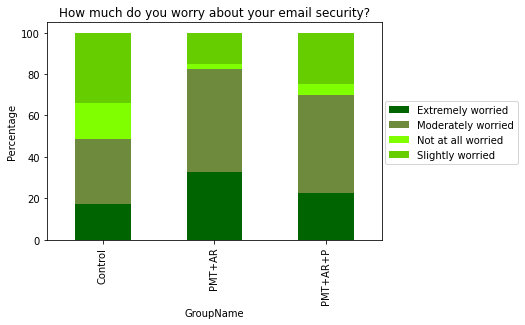

In [52]:
from matplotlib import colors
plot_data_norm.reset_index().plot(x = 'GroupName',kind = 'bar',
                                  stacked = True, title = 'How much do you worry about your email security?', 
                                  color={'Not at all worried':'#7FFF00', 'Slightly worried':'#66CD00', 'Moderately worried':'#6E8B3D', 'Extremely worried':'#006400'},
                  ylabel = 'Percentage');
#plt.yticks = ['0%','20%', '40%', '60%', '80%','100%']
plt.legend(loc = (1.01,0.35));

In [54]:
import pandas as pd
data = pd.read_excel('/content/sample_data/All-Data-Virtru.xlsx')
data.head()

,GroupNumber,“ItrustthesecurityandprivacyofmyGmailaccountsinceitisprovidedb,HowwouldyourateyourfamiliaritywiththeEncryptionconceptonascalefr,Pleaseratethisdocumentsinformationsensitivity,How much do you worry about your email security (without Virtru)?,How concerned or unconcerned would you be if your email was being read by others?,"Please rate your level of disagreement or agreement with the following statements - “When I send an email (without Virtru), the only people who can read it are those I sent it to.”","Please rate your level of disagreement or agreement with the following statements - ""When I send sensitive information via email (without Virtru), Im confident its secure.""","Please rate your level of disagreement or agreement with the following statements - “If I delete an email I have sent, those I sent the email to can no longer read it.”",Please rate the following statements - How likely or unlikely is it for cybercriminals to attempt to access your personal email account?,...,How interested or uninterested are you in using Virtru?,When do you plan to use Virtru?,I strongly intend to use Virtru when I send these emails,"Rate your level of disagreement or agreement with the following statements: - “I intend to use standard email (e.g., Gmail) when I send emails, including sensitive information.”","Rate your level of disagreement or agreement with the following statements: - “I intend to use Virtru when I send emails, including sensitive information.”",How old are you?,What is your gender?,How would you describe your employment status?,Do you have any experience working in or studying computer-related fields?,What is the highest level of education you have completed or degree you have earned? - Selected Choice
0,Group1,3,3,4,4,4,2,2,1,4,...,4,2,1,4,4,2,1,1,0,4
1,Group1,3,2,4,4,4,3,1,2,3,...,4,2,1,2,4,2,1,4,1,3
2,Group1,4,4,4,3,2,3,3,3,3,...,4,2,1,4,4,3,1,1,1,6
3,Group1,4,2,4,4,4,1,1,2,4,...,4,2,1,1,4,2,1,4,1,3
4,Group1,4,3,2,3,3,3,4,4,2,...,4,2,1,4,4,3,1,1,1,4


In [55]:
q1 = data[['GroupNumber','Please rate your level of disagreement or agreement with the following statements - "When I send sensitive information via email (without Virtru), Im confident its secure."']]
q1.head()

,GroupNumber,"Please rate your level of disagreement or agreement with the following statements - ""When I send sensitive information via email (without Virtru), Im confident its secure."""
0,Group1,2
1,Group1,1
2,Group1,3
3,Group1,1
4,Group1,4


In [56]:
q1_map =  {1:'Strongly disagree', 2: 'Somewhat disagree', 3:'Somewhat agree', 4:'Strongly agree'}
q1['Q2'] = q1['Please rate your level of disagreement or agreement with the following statements - "When I send sensitive information via email (without Virtru), Im confident its secure."'].map(q1_map)
q1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GroupNumber,"Please rate your level of disagreement or agreement with the following statements - ""When I send sensitive information via email (without Virtru), Im confident its secure.""",Q2
0,Group1,2,Somewhat disagree
1,Group1,1,Strongly disagree
2,Group1,3,Somewhat agree
3,Group1,1,Strongly disagree
4,Group1,4,Strongly agree


In [57]:
q1_map =  {'Group1':'PMT+AR', 'Group2':'PMT+AR+P', 'Group3':'Control'}
q1['GroupName'] = q1['GroupNumber'].map(q1_map)
q1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GroupNumber,"Please rate your level of disagreement or agreement with the following statements - ""When I send sensitive information via email (without Virtru), Im confident its secure.""",Q2,GroupName
0,Group1,2,Somewhat disagree,PMT+AR
1,Group1,1,Strongly disagree,PMT+AR
2,Group1,3,Somewhat agree,PMT+AR
3,Group1,1,Strongly disagree,PMT+AR
4,Group1,4,Strongly agree,PMT+AR


In [58]:
q1['Q2'].value_counts(normalize = True)

Somewhat agree       0.413223
Somewhat disagree    0.272727
Strongly disagree    0.165289
Strongly agree       0.148760
Name: Q2, dtype: float64

In [59]:
plot_data = q1.groupby('GroupName').agg({'Q2':['count']})
plot_data.head()

,Q2
,count
GroupName,
Control,41
PMT+AR,40
PMT+AR+P,40


In [60]:
plot_data = q1.pivot_table(index = ['GroupName'],columns = ['Q2'] , aggfunc = 'size')
plot_data.head()

Q2,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
GroupName,,,,
Control,21,6,10,4
PMT+AR,13,12,7,8
PMT+AR+P,16,15,1,8


In [61]:
plot_data_norm = plot_data.div(plot_data.sum(axis = 1),axis = 0) * 100
plot_data_norm

Q2,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
GroupName,,,,
Control,51.219512,14.634146,24.390244,9.756098
PMT+AR,32.500000,30.000000,17.500000,20.000000
PMT+AR+P,40.000000,37.500000,2.500000,20.000000


In [62]:
plot_data_norm.columns = ['Somewhat agree','Somewhat disagree', 'Strongly agree', 'Strongly disagree']
plot_data_norm.head()

,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
GroupName,,,,
Control,51.219512,14.634146,24.390244,9.756098
PMT+AR,32.500000,30.000000,17.500000,20.000000
PMT+AR+P,40.000000,37.500000,2.500000,20.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from matplotlib import colors
plot_data_norm.reset_index().plot(x = 'GroupName',kind = 'bar',
                                  stacked = True, title = '"When I send sensitive information via email (without Virtru), Im confident its secure."', 
                                  color={'Strongly disagree':'#7FFF00', 'Somewhat disagree':'#66CD00', 'Somewhat agree':'#6E8B3D', 'Strongly agree':'#006400'},
                  ylabel = 'Percentage');
#plt.yticks = ['0%','20%', '40%', '60%', '80%','100%']
plt.legend(loc = (1.01,0.35));

NameError: ignored